<a href="https://colab.research.google.com/github/mityasereda/Report-Forecasting/blob/master/ReportForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.DataFrame()
folder = '/content/drive/MyDrive/Report Forecasting/Oil Predict/oil_gas_train'
for file in os.listdir(folder):
  df = pd.read_excel(folder + '/' + file, skiprows=27)
  df = df.iloc[:, 8:].rename(columns = {'Unnamed: 8' : 'Parameter'}).T
  df.columns = df.iloc[0]
  df = df.iloc[1:, df.columns.notna()]
  df.dropna(axis = 1, how = 'all', inplace = True)
  df.drop(['Ratios', 'Valuation', 'CHANGES TO SHAREHOLDER EQUITY', 'CASH FLOW STATEMENT', \
'BALANCE SHEET', 'INCOME STATEMENT'], axis = 1, inplace = True)
  df['Company'] = file.rstrip('.xlsx')
  df.reset_index(inplace = True)
  df.columns = pd.io.parsers.base_parser.ParserBase({'names':df.columns, 'usecols':None})._maybe_dedup_names(df.columns)
  for column in df.columns:
    if column not in data.columns:
      data[column] = None
  for column in data.columns:
    if column not in df.columns:
      df[column] = None
  data = data.append(df)
data.rename(columns = {'index' : 'Date'}, inplace=True)
data.reset_index(drop = True)

,Date,Revenue,Consensus:,% Surprise | % Est. vs Consensus,Revenue Growth (YoY),Cost of Revenue,Gross Profit,Gross margin,Other Operating Income,Operating Expenses,...,CAPEX / EBITDA,FCF / DEBT,Gross Leverage (Total Debt / EBITDA),Net Leverage (Net Debt / EBITDA),Total Liabilities / Tangible Assets,Cash + AR / Total Assets,Cash % of Revenue,Company,Div Ex date:,Dividends Per Share (fwd only)
0,Q1 '11 A,21.436696,0,0,NaN,-11.001468,10.435228,0.486793,0,-3.816937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCEI,None,None
1,Q2 '11 A,24.89236,0,0,NaN,-11.756303,13.136057,0.527714,0,-4.192664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCEI,None,None
2,Q3 '11 A,26.85424,0,0,NaN,-12.785786,14.068454,0.523882,0,-5.539955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCEI,None,None
3,Q4 '11 A,34.444,0,0,NaN,-15.753,18.691,0.542649,0,-10.948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCEI,None,None
4,Q1 '12 A,46.619292,0,0,1.174742,-18.108374,28.510918,0.611569,0,-10.75065,...,1.169401,-0.783113,0.270259,0.270259,0.259115,0.052533,0,BCEI,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Q2 '19 A,236.26,0,0,-0.201414,-172.41,63.85,0.270253,0,-44.027,...,3.504594,-0.089272,2.653758,2.593956,0.549938,0.037052,0.032541,╨Ъ╨╜╨╕╨│╨░8,None,None
2052,Q3 '19 A,176.942,0,0,-0.452478,-154.608,22.334,0.126222,0,-40.69,...,0.971638,0.020965,3.434923,3.315563,0.538196,0.041221,0.060308,╨Ъ╨╜╨╕╨│╨░8,None,None
2053,Q4 '19 A,230.844,0,0,-0.259581,-246.974,-16.13,-0.069874,0,-71.334,...,3.270434,-0.073757,2.940712,2.880834,0.766182,0.057908,0.03549,╨Ъ╨╜╨╕╨│╨░8,None,None
2054,Q1 '20 A,165.187008,0,0,-0.288741,-142.680992,22.506016,0.136246,0,-179.586,...,-1.652038,0.008345,7.096037,6.952897,0.843584,0.044655,0.037845,╨Ъ╨╜╨╕╨│╨░8,None,None


In [4]:
38 - data.groupby('Company').aggregate('count')

,Date,Revenue,Consensus:,% Surprise | % Est. vs Consensus,Revenue Growth (YoY),Cost of Revenue,Gross Profit,Gross margin,Other Operating Income,Operating Expenses,...,CAPEX / REVENUE,CAPEX / EBITDA,FCF / DEBT,Gross Leverage (Total Debt / EBITDA),Net Leverage (Net Debt / EBITDA),Total Liabilities / Tangible Assets,Cash + AR / Total Assets,Cash % of Revenue,Div Ex date:,Dividends Per Share (fwd only)
Company,,,,,,,,,,,,,,,,,,,,,
AMPY,0,0,0,0,7,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38
APA,0,0,0,0,4,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38
AR,0,0,0,0,10,0,0,0,0,0,...,4,4,4,4,4,7,4,4,38,38
BATL,0,0,0,0,4,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38
BCEI,0,0,0,0,4,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38
BRY,0,0,0,0,31,0,0,0,0,0,...,4,4,4,4,4,8,4,4,38,38
BSM,0,0,0,0,19,0,0,0,0,0,...,4,4,4,4,4,8,4,4,38,38
CDEV,0,0,0,0,24,0,0,0,0,0,...,4,4,4,4,4,8,4,4,38,38
CHK,0,0,0,0,4,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38


Most of the companies has data for 38 periods. However CRBO has data for 2010 as well, furthermore it is the only company that has information about expected dividends

In [5]:
(38 - data.query('Company != "CRBO"').groupby('Company').count()).sum().sum()


12330

In [6]:
(38 - data.query('Company != "CRBO"').drop(['Div Ex date:', 'Dividends Per Share (fwd only)'], axis = 1).groupby('Company').count()).sum().sum()

8302

Total number of Nones equals to 12330 (without 'Div Ex date:', 'Dividends Per Share (fwd only)' 8302)


In [7]:
data = data.query('Revenue != 0')

Let's delete rows that have Revenue == 0 and then divide existing companies to 5 groups for more insightful analysis

In [8]:
clustering = data.groupby('Company')[['Revenue', 'Net Income']].mean()
clustering

,Revenue,Net Income
Company,,
AMPY,86.595971,-10.440193
APA,2531.868423,362.683158
AR,666.782028,3.130844
BATL,136.569711,-9.101872
BCEI,73.961080,1.163313
BRY,151.914089,-2.584091
BSM,113.102783,38.230120
CDEV,148.282223,15.400374
CHK,3008.684219,92.742315


In [9]:
groups = np.array_split(clustering.Revenue.sort_values(), 5)

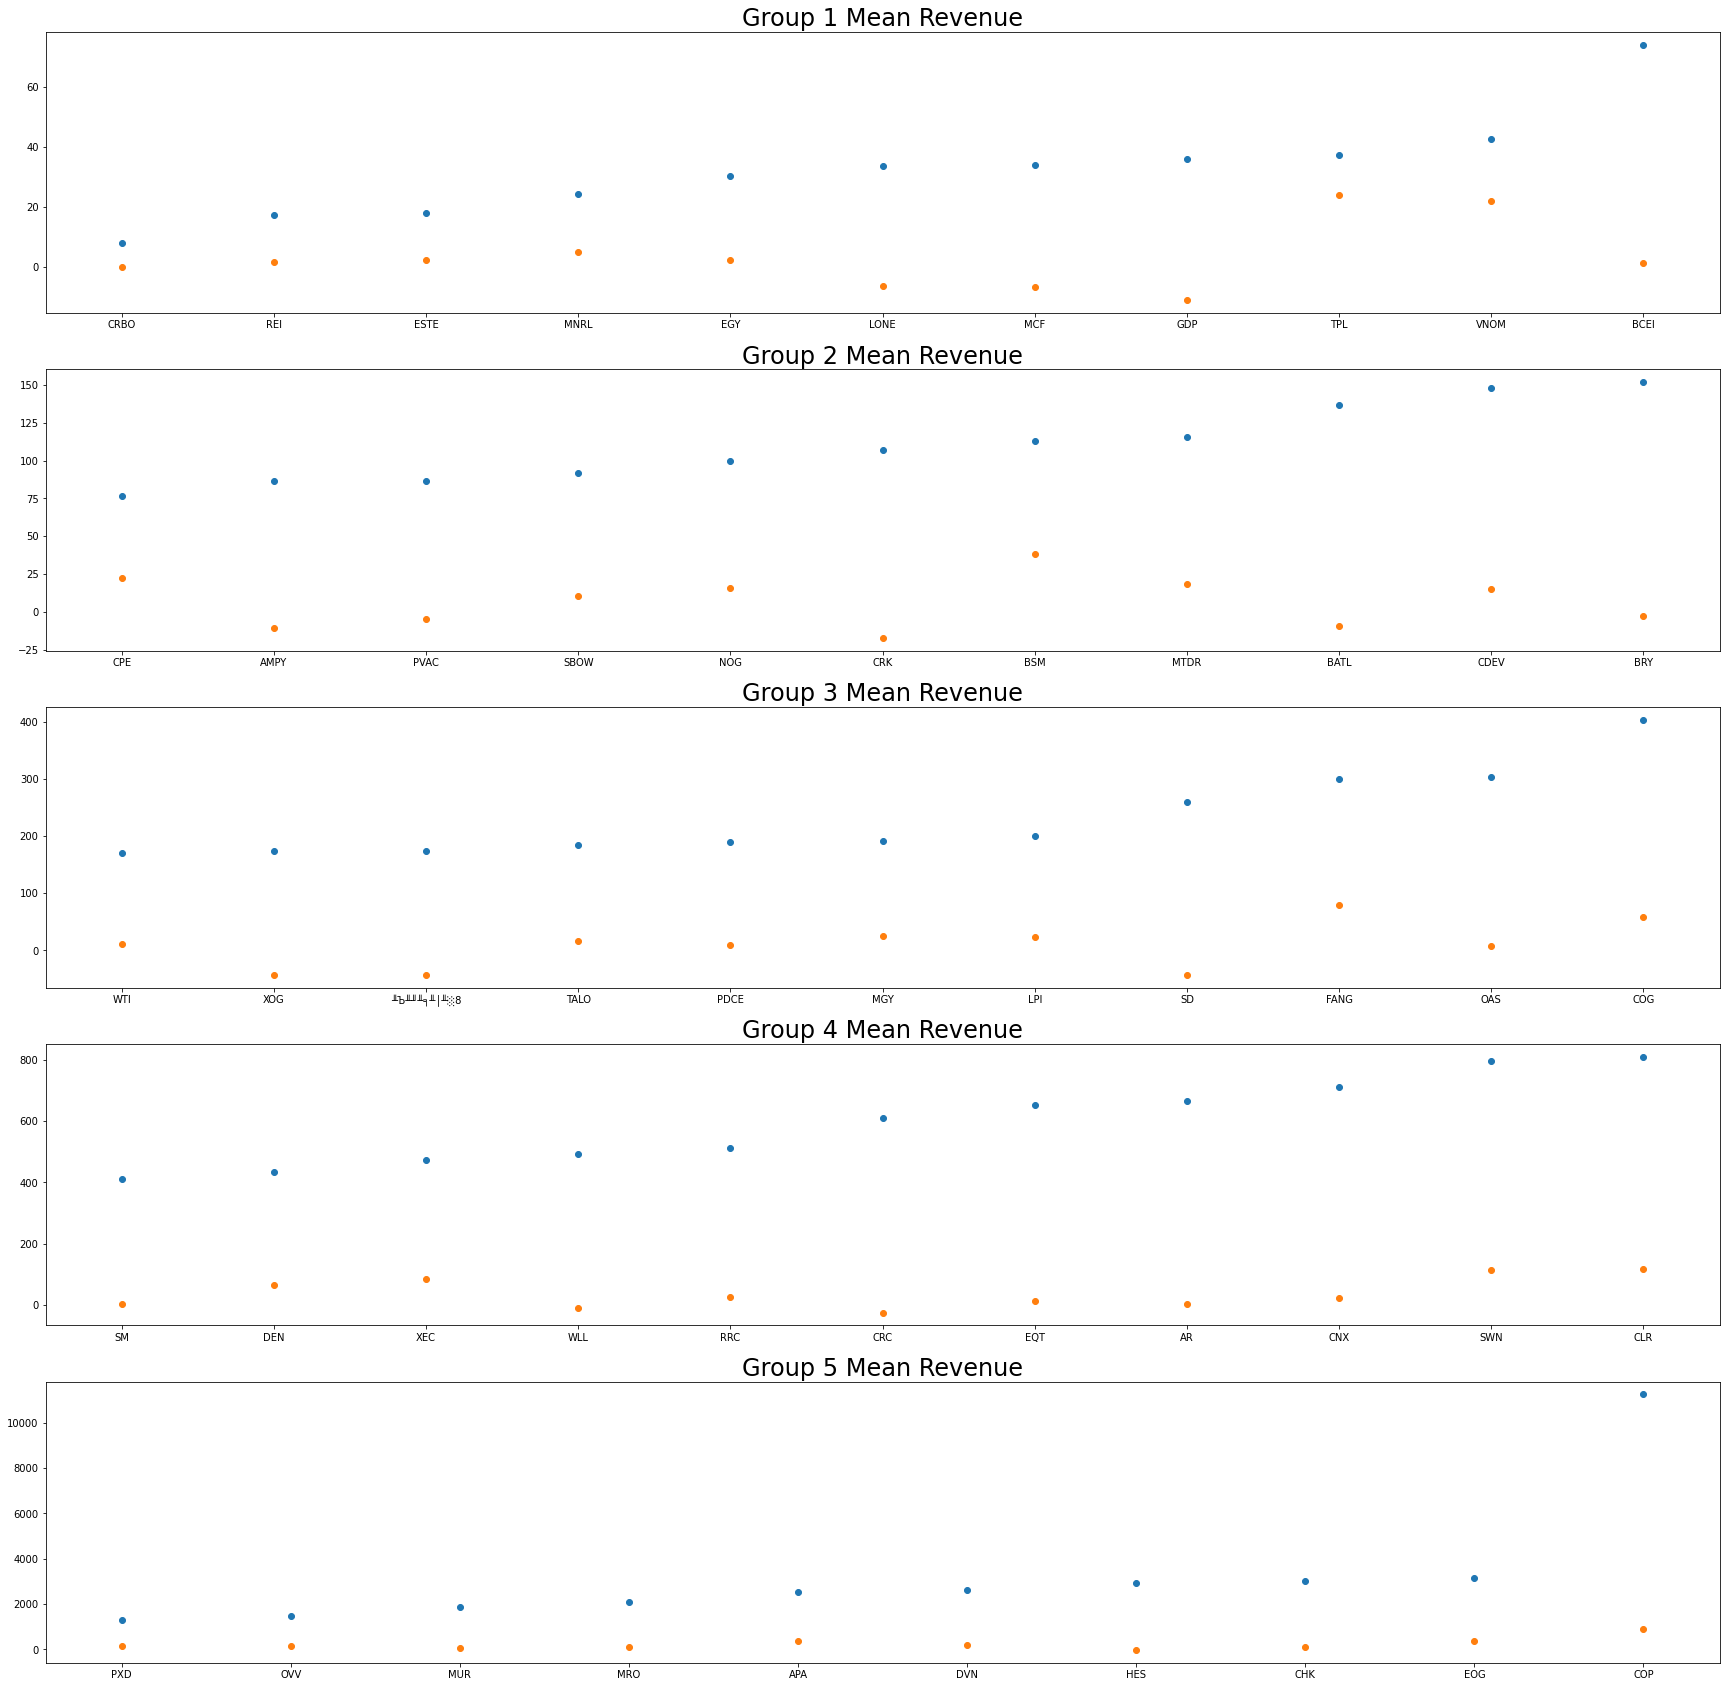

In [10]:
fig, axes = plt.subplots(len(groups), 1, figsize=(30, 30))
for i in range(len(groups)):
  axes[i].scatter(x = groups[i].index, y = clustering.loc[list(groups[i].index)].Revenue)
  axes[i].scatter(x = groups[i].index, y = clustering.loc[list(groups[i].index)]['Net Income'])
  axes[i].set_title('Group {} Mean Revenue'.format(i+1), fontdict = {'fontsize': 24})

Text(0.5, 1.0, 'Revenue Boxplot')

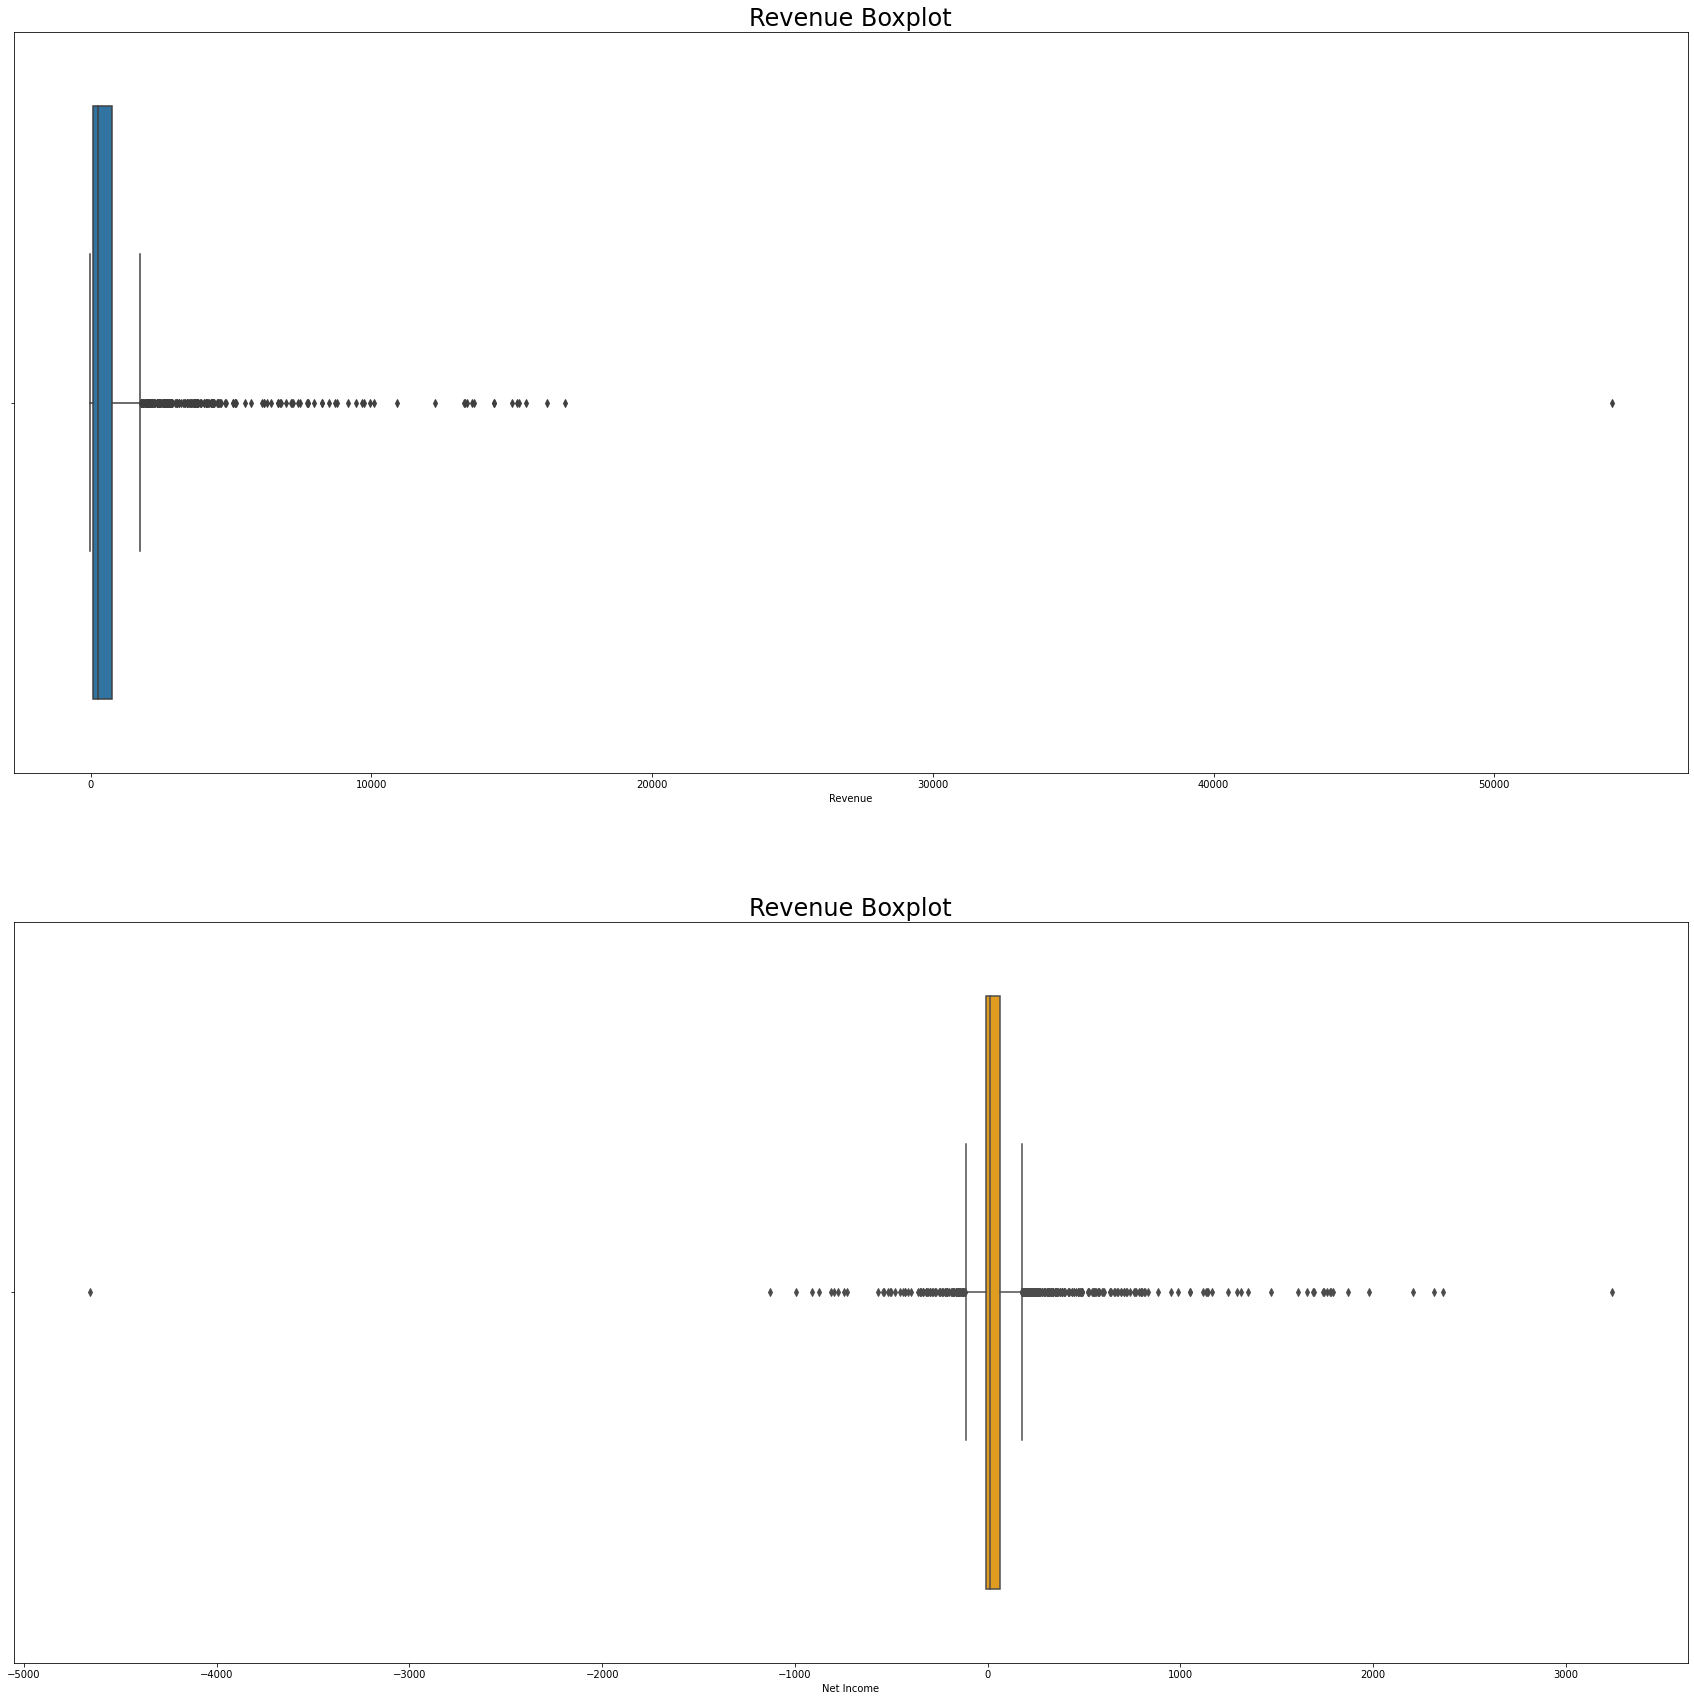

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(30, 30))
sns.boxplot(data.Revenue, ax = axes[0]).set_title('Revenue Boxplot', fontdict = {'fontsize': 24})
sns.boxplot(data['Net Income'], ax = axes[1], color='orange').set_title('Revenue Boxplot', fontdict = {'fontsize': 24})

In [12]:
data.query('Revenue > 50000')

,Date,Revenue,Consensus:,% Surprise | % Est. vs Consensus,Revenue Growth (YoY),Cost of Revenue,Gross Profit,Gross margin,Other Operating Income,Operating Expenses,...,CAPEX / EBITDA,FCF / DEBT,Gross Leverage (Total Debt / EBITDA),Net Leverage (Net Debt / EBITDA),Total Liabilities / Tangible Assets,Cash + AR / Total Assets,Cash % of Revenue,Company,Div Ex date:,Dividends Per Share (fwd only)
0,Q1 '11 A,54174.998528,61716.75,-0.122199,NaN,-48376.999936,5797.998592,0.107024,0,-573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COP,None,None


In [13]:
data[data['Net Income'] < -4000]

,Date,Revenue,Consensus:,% Surprise | % Est. vs Consensus,Revenue Growth (YoY),Cost of Revenue,Gross Profit,Gross margin,Other Operating Income,Operating Expenses,...,CAPEX / EBITDA,FCF / DEBT,Gross Leverage (Total Debt / EBITDA),Net Leverage (Net Debt / EBITDA),Total Liabilities / Tangible Assets,Cash + AR / Total Assets,Cash % of Revenue,Company,Div Ex date:,Dividends Per Share (fwd only)
36,Q1 '20 A,1354,1476.143,-0.082745,-0.138677,-681,673,0.497046,0,-862,...,2.198925,-0.041769,3.364732,2.58101,0.615955,0.138727,0.331368,HES,None,None


In terms of Revenue we have one enormous observation for COP on Q1 11. And one extra little for HES on Q1 20. Let's look at the boxplots without them

Text(0.5, 1.0, 'Revenue Boxplot')

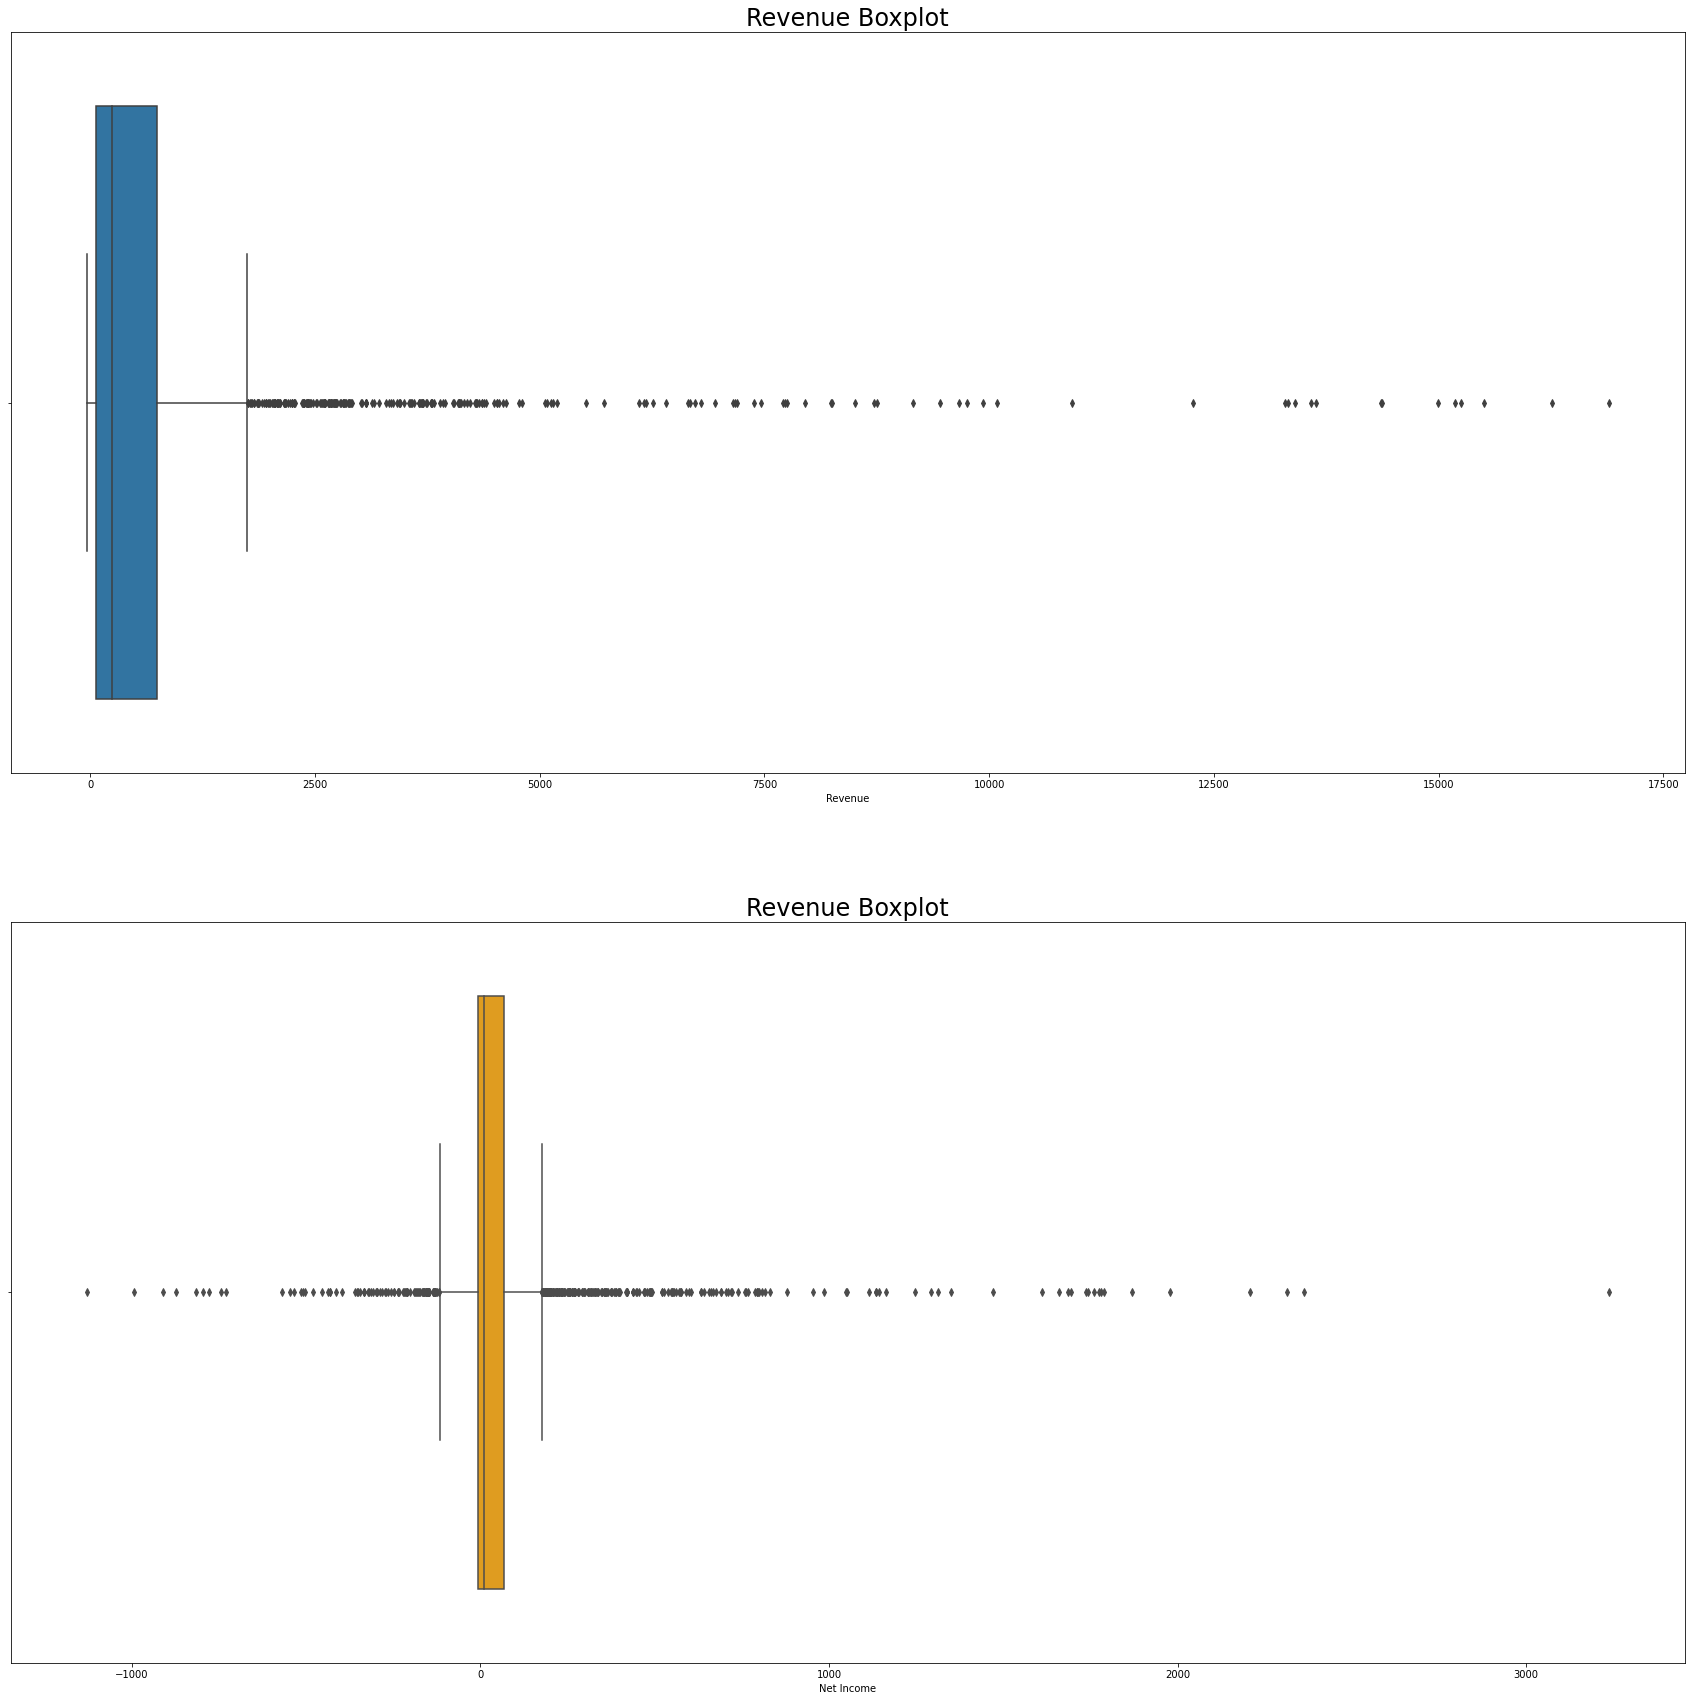

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(30, 30))
sns.boxplot(data.query('Revenue < 50000').Revenue, ax = axes[0]).set_title('Revenue Boxplot', fontdict = {'fontsize': 24})
sns.boxplot(data[data['Net Income'] > -4000]['Net Income'], ax = axes[1], color='orange').set_title('Revenue Boxplot', fontdict = {'fontsize': 24})

This one looks far more pleasant, however we can see that there are groups of companies which earn more than average company in our sample

In [15]:
import statsmodels.api as sm

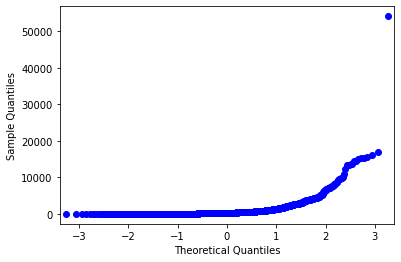

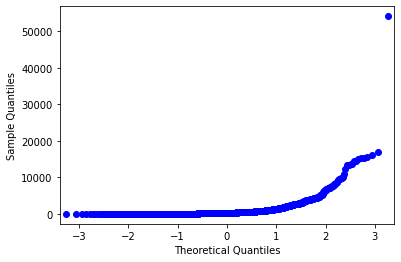

In [16]:
sm.qqplot(data.Revenue)

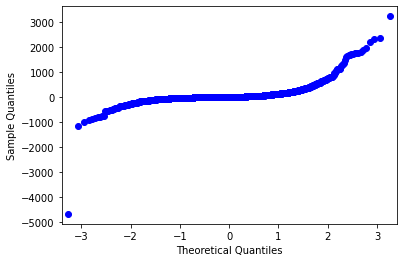

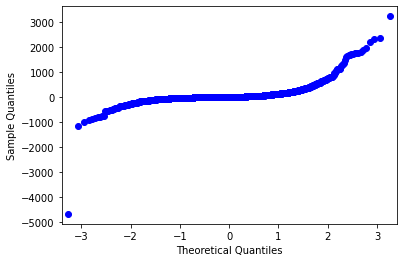

In [17]:
sm.qqplot(data['Net Income'])

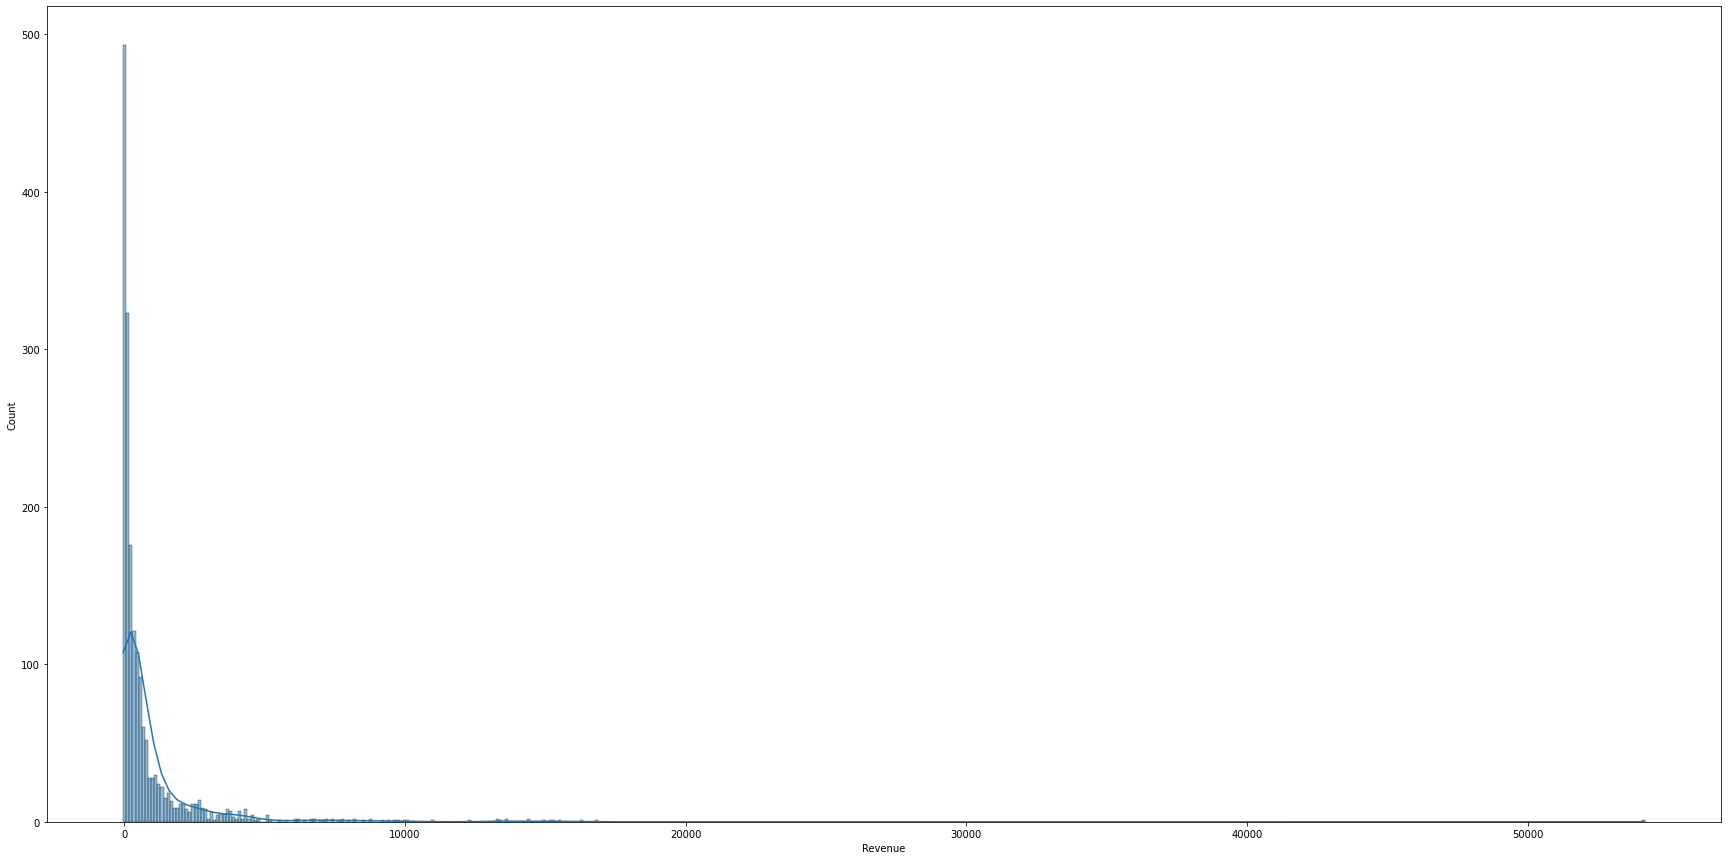

In [18]:
plt.figure(figsize = (30,15))
sns.histplot(data.Revenue, kde=True)

In [19]:
import scipy.stats as st

In [20]:
print('Revenue : ', st.shapiro(data.Revenue))
print('Net Income : ', st.shapiro(data['Net Income']))

Revenue :  ShapiroResult(statistic=0.36419159173965454, pvalue=0.0)
Net Income :  ShapiroResult(statistic=0.5176058411598206, pvalue=0.0)


It is obvious that Revenue and Net Income doesn't follow normal distribution. It almost look like F distribution

#Score for the task

I haven't decided on the score parameter yet. However my current thoughts are to use a combination of classic approaches like R^2 or Log-Likelehood
with fine system based on the movements of values (I.e. it's better to predict the direction of the movement correctly but not too precise than to predict closely to the value but with opposite sign)



#ARIMA

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
for company in data.Company.unique():
  company_data = data.query('Company == "{}"'.format(company))

In [23]:
company_data = data.query('Company == "{}"'.format('BCEI'))

In [24]:
start = company_data.Date.iloc[0,]
start = '20' + start[start.index("'")+1:start.index('A')-1]
company_data.index = pd.date_range(start, freq = 'Q', periods = company_data.shape[0])

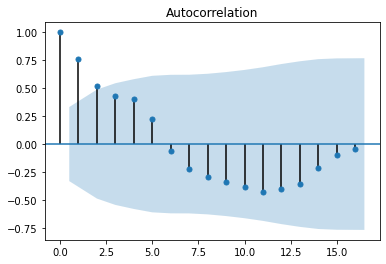

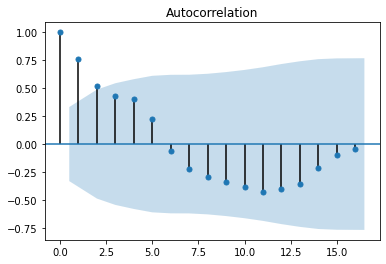

In [25]:
plot_acf(company_data.Revenue.diff(3).dropna())

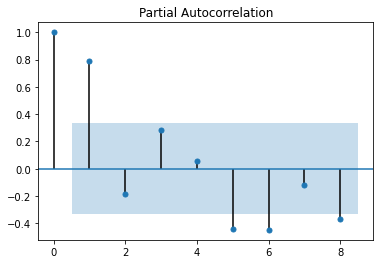

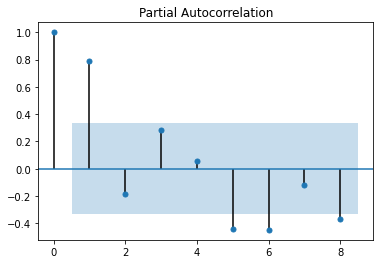

In [26]:
plot_pacf(company_data.Revenue.diff(3).dropna(), lags = 8)

There is a strong positive correlation in lag-1 and a strong negative correlation in lag-8

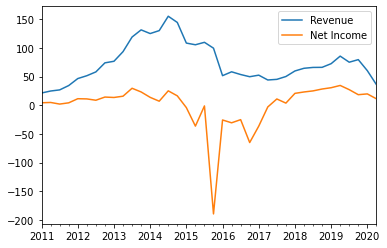

In [27]:
company_data[['Revenue', 'Net Income']].plot()

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

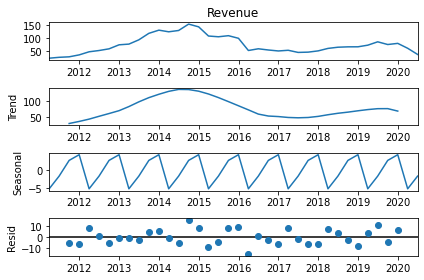

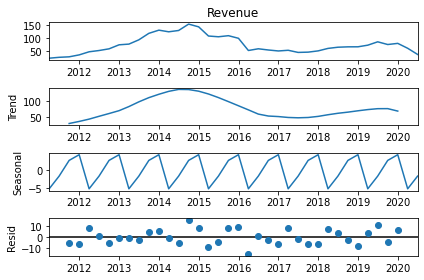

In [29]:
result = seasonal_decompose(company_data.Revenue)
result.plot()

In [30]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(company_data.Revenue.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -2.5312984409946577
ADF p-values: 0.10804358308930578
ADF number of lags used: 4
ADF number of observations: 33
ADF critical values: {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}
ADF best information criterion: 223.68930900435794


According to the Dickey-Fuller test we can't tell that the Revenue is trend stationary

In [31]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 51.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [32]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [33]:
pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 679 kB 5.5 MB/s 
     |████████████████████████████████| 216 kB 50.8 MB/s 
     |████████████████████████████████| 133 kB 47.6 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.15.9-py3-none-any.whl size=109868 sha256=f16afb7bf9bd53113d3110b608388b4ca786c38fc89ed77571d513f383ed592b
  Stored in directory: /root/.cache/pip/wheels/41/07/22/edabc7f9c222f87b01c3a9acc77e20d53958a17d89e600e1e7
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9b67e3baaac6d7fd20d5c38fa8554c8e377ca246101639383f78234128754be7
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's de

In [34]:
from scalecast.Forecaster import Forecaster

In [74]:
train, test = train_test_split(company_data.Revenue.values, train_size = 0.8)
min_aic = float('inf')
for i in range(usedlag+1):
  model = pm.auto_arima(train, d = i, trace=True)
  if model.aic() < min_aic:
    min_model = model
    min_aic = model.aic()
preds = min_model.predict(test.shape[0])
min_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=256.733, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=306.763, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253.863, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=279.578, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.305, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253.532, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=255.283, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=254.613, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=252.734, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=254.625, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=265.216, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=253.230, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.572 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(3, 3, 1)   Log Likelihood                -111.073
Date:                Sun, 13 Nov 2022   AIC                            232.147
Time:                        14:54:39   BIC                            238.626
Sample:                             0   HQIC                           234.073
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7766      0.163     -4.759      0.000      -1.096      -0.457
ar.L2         -0.8069      0.130     -6.227      0.000      -1.061      -0.553
ar.L3         -0.4899      0.121     -4.053      0.000      -0.727      -0.253
ma.L1         -0.7660      0.172     -4.461      0.000      -1.103      -0.429
sigma2       187.4318     62.139      3.016      0.003      65.641     309.223
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.53   Prob(JB):                         0.87
Heteroskedasticity (H):               4.64   Skew:                            -0.07
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

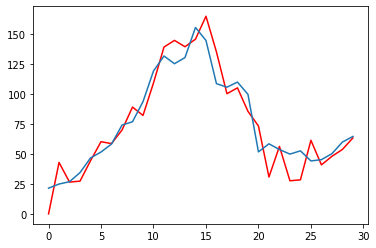

In [75]:
plt.plot(min_model.fittedvalues(), color = 'r')
plt.plot(train)

In [76]:
f = Forecaster(y=company_data.Revenue,current_dates=company_data.Revenue.index)

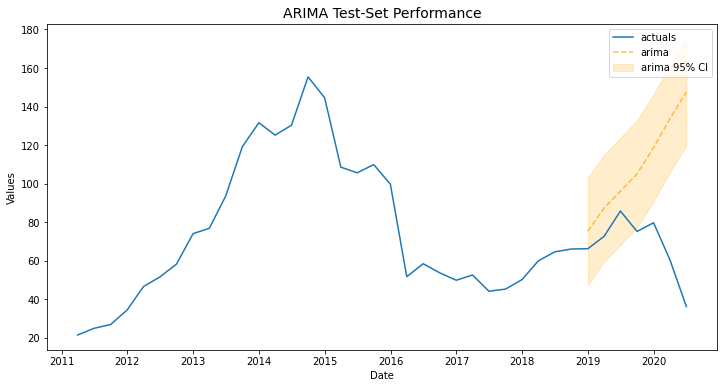

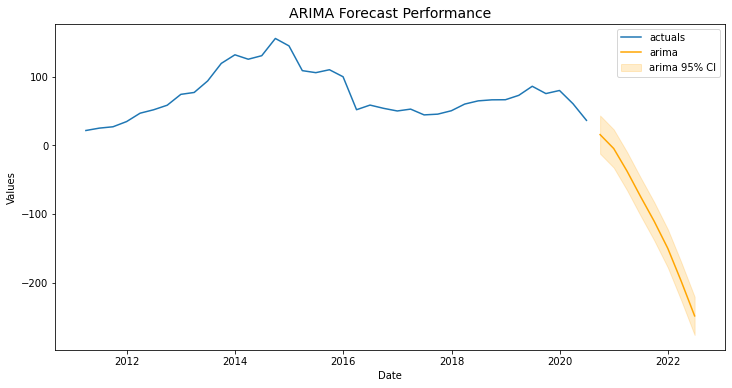

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:                 ARIMA(3, 3, 1)   Log Likelihood                -143.583
Date:                Sun, 13 Nov 2022   AIC                            297.167
Time:                        14:55:10   BIC                            304.943
Sample:                             0   HQIC                           299.851
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7863      0.154     -5.116      0.000      -1.088      -0.485
ar.L2         -0.7834      0.130     -6.012      0.000      -1.039      -0.528
ar.L3         -0.4724      0.126     -3.761      0.000      -0.719      -0.226
ma.L1         -0.7196      0.167     -4.297      0.000      -1.048      -0.391
sigma2       192.1530     58.804      3.268      0.001      76.900     307.406
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.50   Prob(JB):                         0.76
Heteroskedasticity (H):               1.45   Skew:                            -0.05
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
f.generate_future_dates(len(test)) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(order=(3,3,1),call_me='arima')

# View test results
f.plot_test_set(ci=True,models='arima')
plt.title('ARIMA Test-Set Performance',size=14)

# View forecast results
f.plot(ci=True,models='arima')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

array([  0.        ,  42.87657316,  26.50383929,  27.32288517,
        44.33137036,  60.18030535,  58.58349278,  69.88818948,
        89.03515689,  82.07637295, 109.13260018, 139.05875464,
       144.60742245, 139.31998975, 145.61588204, 164.73139424,
       134.9325413 , 100.16766576, 105.06638337,  85.47244906,
        73.27695232,  30.73551639,  56.25841344,  27.62280185,
        28.39973026,  61.35368624,  40.89378696,  47.9813892 ,
        53.70527856,  63.34584033,  72.93017401,  85.6701047 ,
       100.00626563, 113.28069609, 129.46162801, 148.97166813,
       169.58288484, 190.74052666, 214.46601127])